In [1]:
%classpath add jar ../Fiji.app/jars/*
%classpath add jar ../Fiji.app/jars/bio-formats/*

In [2]:
currentPath = System.getProperty("java.library.path")
newPath = currentPath + ":../Fiji.app/lib/linux64"
System.setProperty( "java.library.path", newPath )

/usr/java/packages/lib/amd64:/usr/lib64:/lib64:/lib:/usr/lib

In [3]:
import net.imagej.ImageJ
ij2 = new ImageJ()

net.imagej.ImageJ@5dfde935

# Histogram, mean and standard deviation

We consider the acquired image as a signal $f(x,y,z,c,t)$. For now we will only use two dimensional images. In this chapter we will examine some statistical concepts that are used to characterize signals. 

As an example we will take the following image:

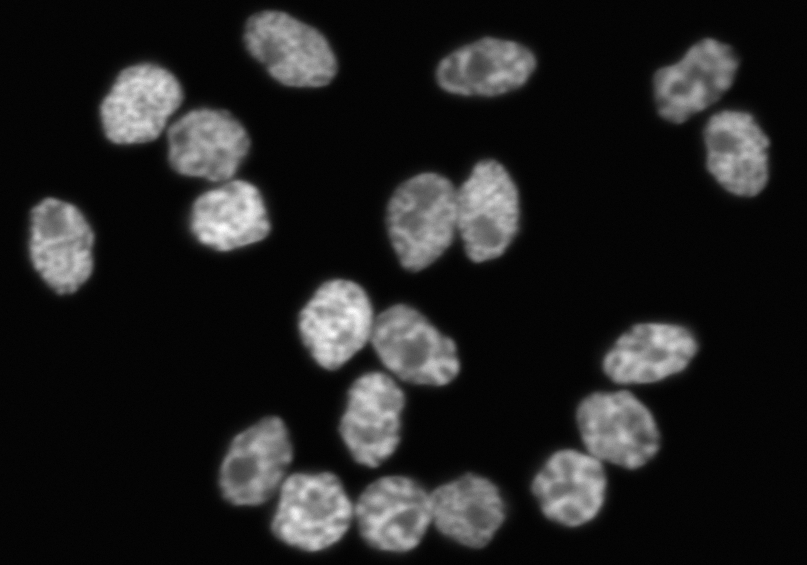

In [5]:
import net.imglib2.img.display.imagej.ImageJFunctions
import net.imglib2.img.array.ArrayImgs
path = '../BBBC001_v1_images_tif/BBBC024_v1_c50_highSNR_images_TIFF/out/image-final_0000.tif'
image = ij2.io().open(path)
ip = ImageJFunctions.wrap(image, "nuclei")
ip.getProcessor().setMinAndMax(ip.getProcessor().getStatistics().min, ip.getStatistics().max)
beakerx.pixels = ip.getProcessor().getPixels();
Image(ip.getBufferedImage())

## The histogram of the signal

In [6]:
h = ij2.op().image().histogram(image, 256).toLongArray()
beakerx.histo=h
OutputCell.HIDDEN

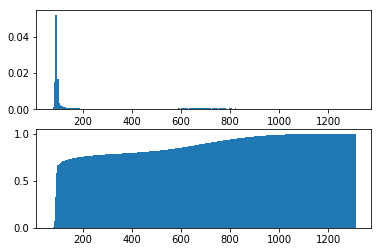

min: 72
max: 1312
background mean:  96.55978763298296
background stddev: 16.90242377865542
foreground mean:  646.6367546802294
foreground stddev: 220.91716852627596


In [8]:
%%python
import numpy
from beakerx.object import beakerx
from matplotlib import pyplot as plt

imArray = numpy.array(beakerx.pixels, dtype='uint16')

plt.figure(1)
plt.subplot(211)
hist, bins, patches = plt.hist(imArray, 256, density=True)
plt.subplot(212)
cHist, cBins, cPatches = plt.hist(imArray, 256, cumulative=True, density=True)
plt.show()

print('min:', imArray.min())
print('max:', imArray.max())
print('background mean: ', (imArray[imArray<=200]).mean())
print('background stddev:', (imArray[imArray<=200]).std())
print('foreground mean: ', (imArray[imArray>200]).mean())
print('foreground stddev:', (imArray[imArray>200]).std())

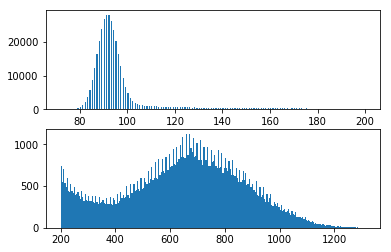

In [11]:
%%python
plt.figure(2)
plt.subplot(211)
hist, bins, patches = plt.hist(imArray[imArray<=200], 256, density=False)
plt.subplot(212)
hist, bins, patches = plt.hist(imArray[imArray>200], 256, density=False)
plt.show()